***DIWALI SALES ANALYSIS***

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#Loading data
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# removing the unwanted columns
df.drop(columns=['Status','unnamed1'],inplace=True)

In [10]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
#dropping null values and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [24]:
#rename columns
df.rename(columns={'Marital_Status':'Marriage','Cust_name':'Customer_name'},inplace=True)

In [26]:
##checking countn,mean,std,and %s
df.describe()

,User_ID,Age,Marriage,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084982
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728776
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [28]:
#i to use the describe() only for age,order,amount
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084982
std,12.756116,1.114880,5221.728776
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


***Exploratory Data Analysis***

***Gender***

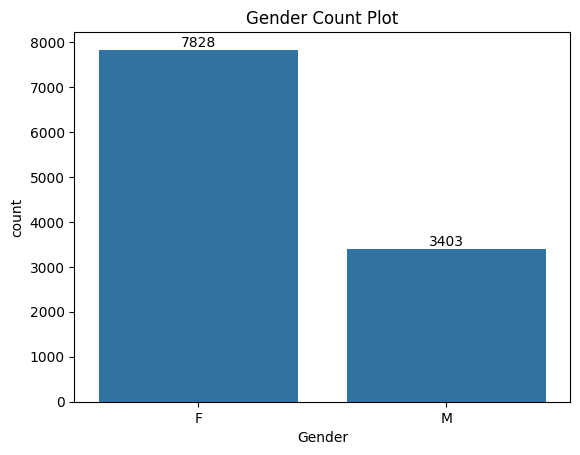

In [33]:
#ploting a bar char for Gender and count
plt.title('Gender Count Plot')
a=sns.countplot(data=df, x='Gender')
for bars in a.containers:
    a.bar_label(bars)

In [50]:
#Gender vs SUM() of Total Amounnt 
b=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
b

,Gender,Amount
0,F,74307682.43
1,M,31871146.00


<Axes: title={'center': 'Gender VS Sum(total Amount)'}, xlabel='Gender', ylabel='Amount'>

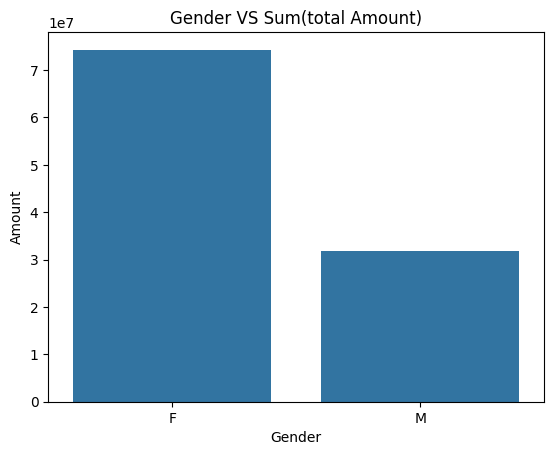

In [52]:
#bar chart for Gender vs SUM() Total Amounnt
b=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title('Gender VS Sum(total Amount)')
sns.barplot(data=b, x='Gender', y='Amount')


* Most of the buyers are females and purchasing power of females is also high

***Age***

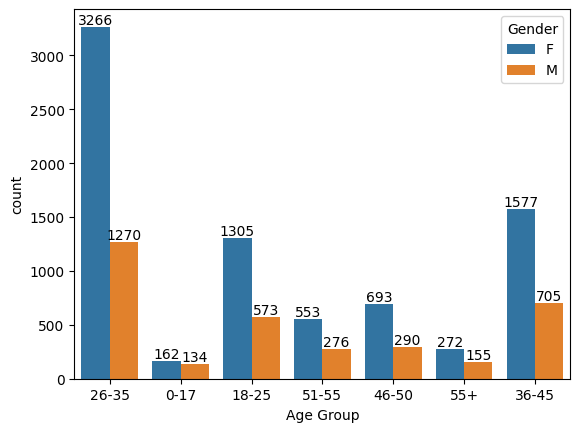

In [54]:
#Age Group wise Genders
c=sns.countplot(data=df, x='Age Group', hue='Gender')
for bars in c.containers:
    c.bar_label(bars)

*here most of the buyers are of 26-35 years age group female*

In [55]:
#SUM() Total Amount Vs Age Group
d=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
d

,Age Group,Amount
2,26-35,42581768.94
3,36-45,22135136.49
1,18-25,17235530.00
4,46-50,9207844.00
5,51-55,8237909.00
6,55+,4080987.00
0,0-17,2699653.00


C:\Users\navin\AppData\Local\Temp\ipykernel_2076\822266156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d, x='Age Group', y='Amount', palette='husl')


<Axes: title={'center': 'SUM(Total Amount) Vs Age Group'}, xlabel='Age Group', ylabel='Amount'>

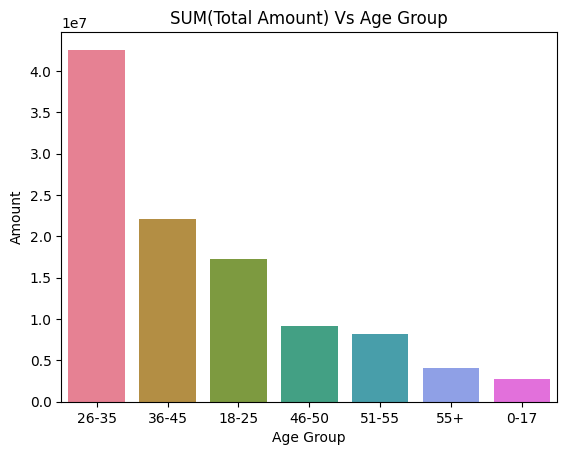

In [58]:
#plot the above values in a bar grapgh 
plt.title('SUM(Total Amount) Vs Age Group')
sns.barplot(data=d, x='Age Group', y='Amount', palette='husl')

*From the above graph, we can see that the most of the buyers are of 26-35 years age group people Female*

***State***

In [59]:
#Top 10 States based on Total Number of Orders made
e=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
e

,State,Orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1063


C:\Users\navin\AppData\Local\Temp\ipykernel_2076\1842650157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=e, x='State', y='Orders', palette='husl')


<Axes: title={'center': 'Top 10 States based on Total Number of Orders'}, xlabel='State', ylabel='Orders'>

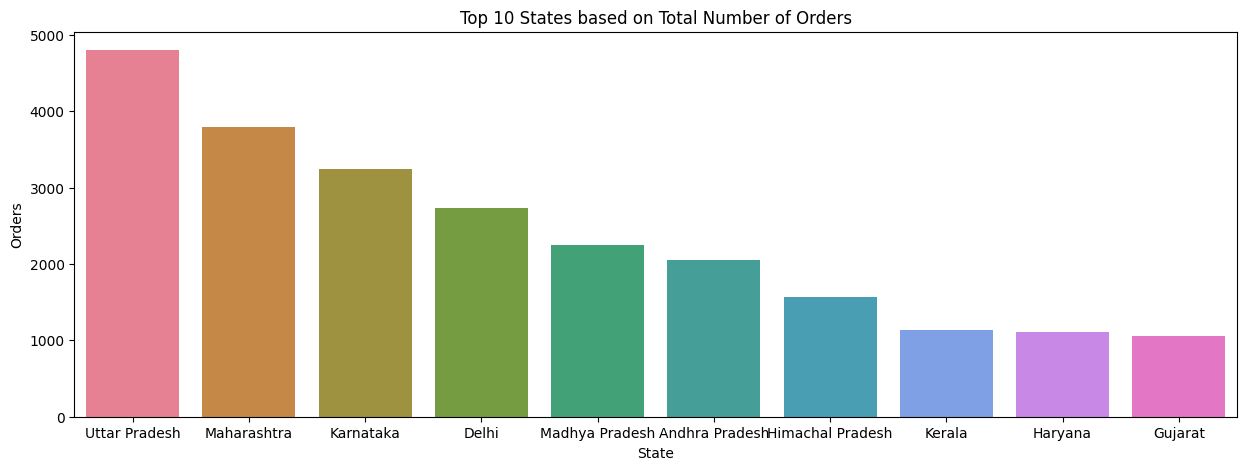

In [63]:
#Visualize the above thing in graph

plt.figure(figsize=(15,5))
plt.title('Top 10 States based on Total Number of Orders')
sns.barplot(data=e, x='State', y='Orders', palette='husl')

*From the above graphs we can see most of the orders & total Sales/Amount are from UttarPradesh, Maharashtra, Karnataka, Delhi*

***Marriage***

C:\Users\navin\AppData\Local\Temp\ipykernel_2076\1547470874.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f=sns.countplot(data=df, x='Marriage', palette='husl')


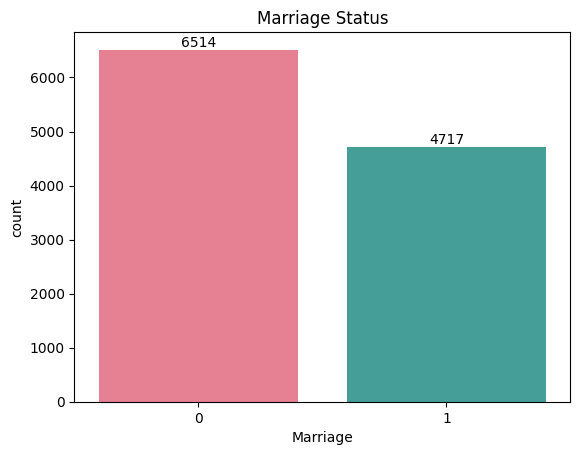

<Figure size 700x500 with 0 Axes>

In [65]:
f=sns.countplot(data=df, x='Marriage', palette='husl')
plt.title('Marriage Status')
plt.figure(figsize=(7,5))
for bars in f.containers:
    f.bar_label(bars)

<Axes: title={'center': 'Gender wise Marriages'}, xlabel='Marriage', ylabel='Amount'>

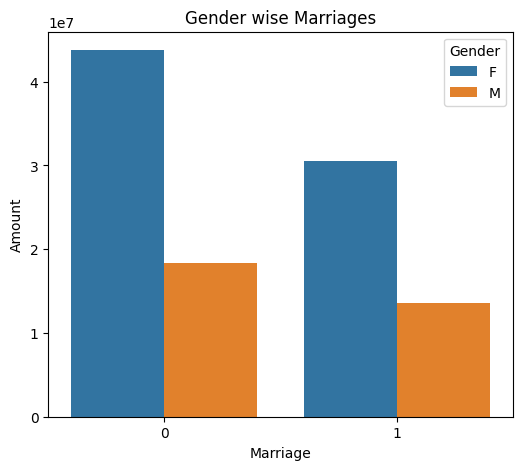

In [66]:
g=df.groupby(['Marriage', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(6,5))
plt.title('Gender wise Marriages')
sns.barplot(data=g, x='Marriage', y='Amount', hue='Gender')

*From the graphs most of the buyers are married Females and they have high purchasing power*

***Occupation***

C:\Users\navin\AppData\Local\Temp\ipykernel_2076\2959237013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h=sns.countplot(data=df, x='Occupation', palette='husl')


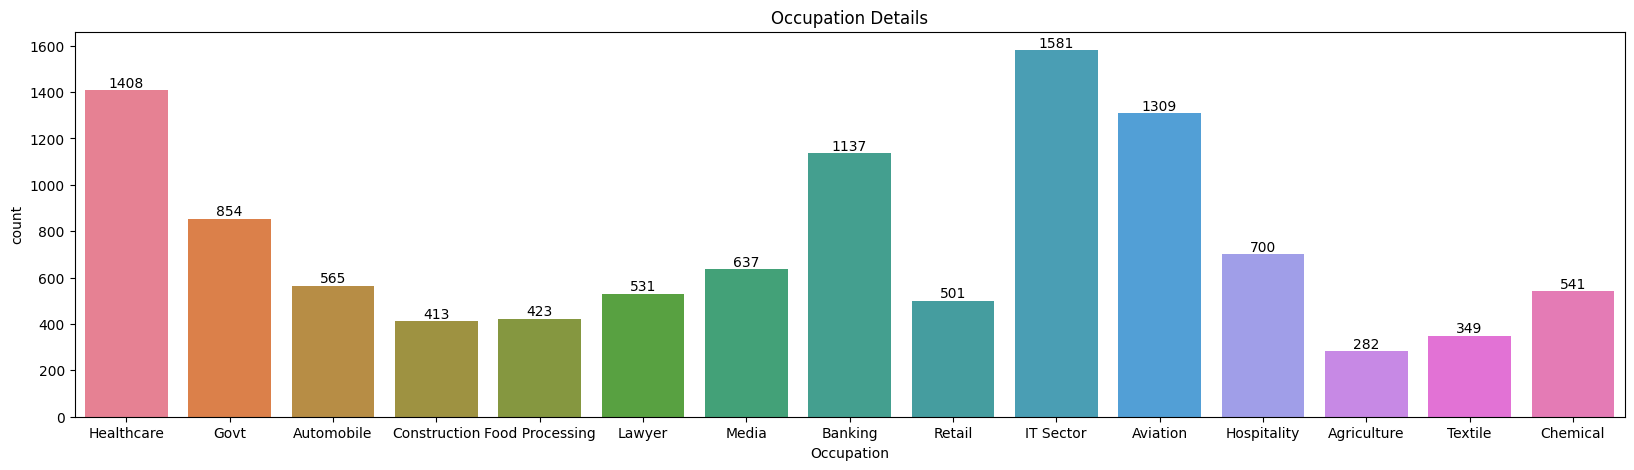

In [69]:
plt.figure(figsize=(20,5))
plt.title('Occupation Details')
h=sns.countplot(data=df, x='Occupation', palette='husl')
for bars in h.containers:
    h.bar_label(bars)

C:\Users\navin\AppData\Local\Temp\ipykernel_2076\4019136830.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=i, x='Occupation', y='Amount', palette='husl')


<Axes: title={'center': 'Total Amount Vs Occupation'}, xlabel='Occupation', ylabel='Amount'>

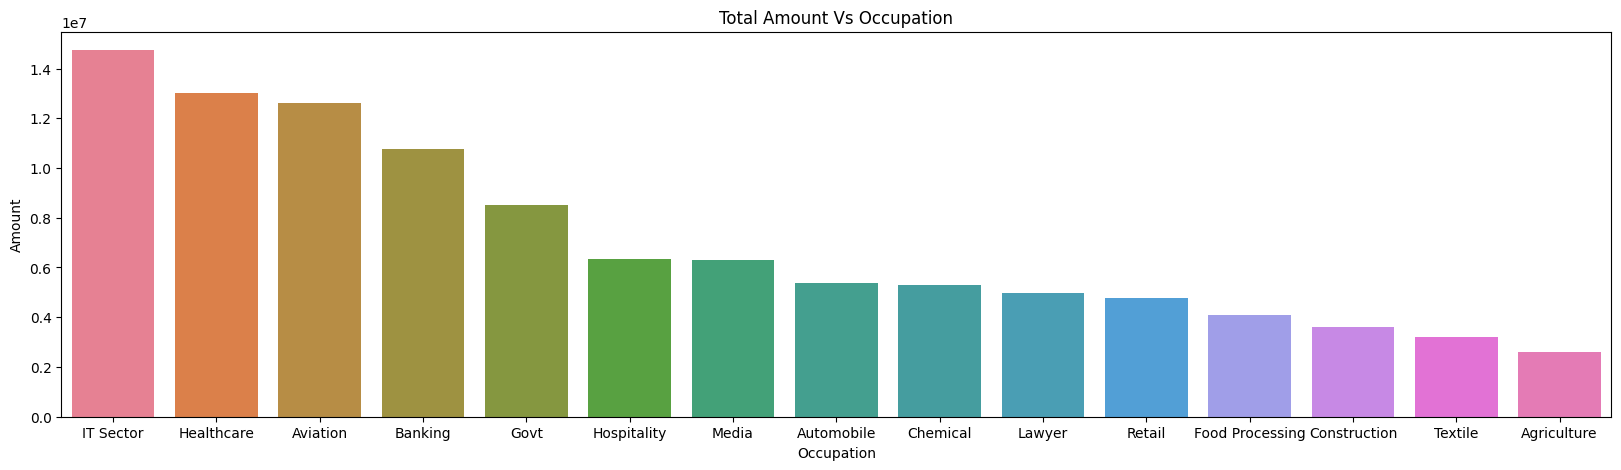

In [72]:
i=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(20,5))
plt.title('Total Amount Vs Occupation')
sns.barplot(data=i, x='Occupation', y='Amount', palette='husl')


*From the above graph we can see that most of the buyers are working in IT Sectors, Healthcare, and Aviation Sector*

***Product Category***

C:\Users\navin\AppData\Local\Temp\ipykernel_2076\235807895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  j=sns.countplot(data=df, x='Product_Category', palette='husl')


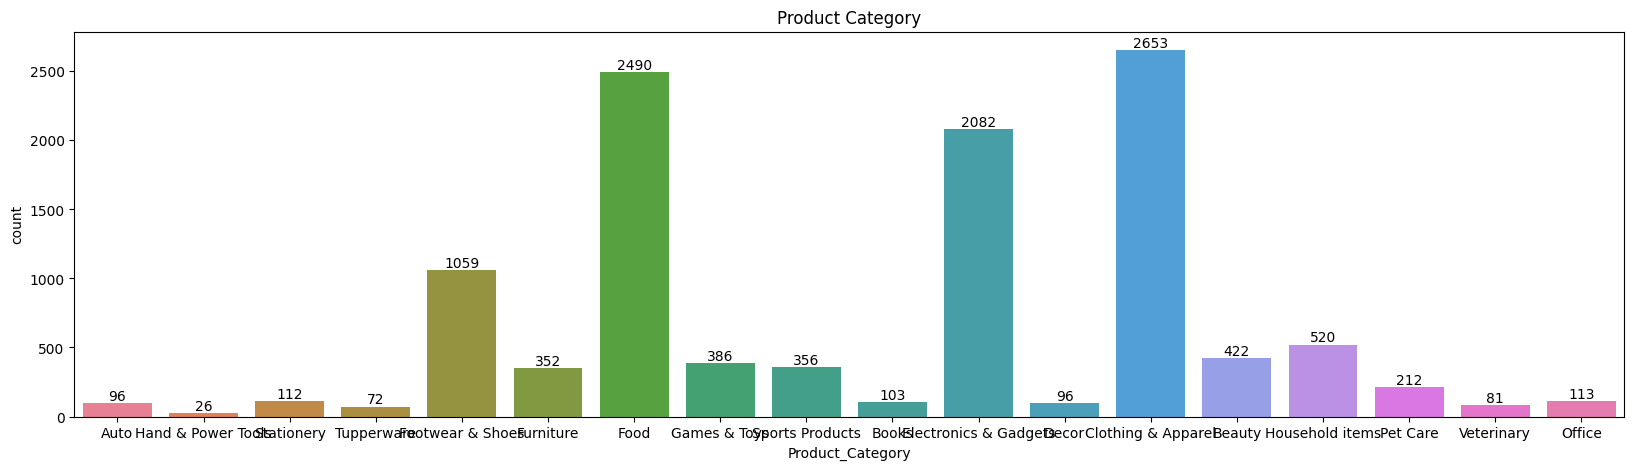

In [74]:
plt.figure(figsize=(20,5))
plt.title('Product Category')
j=sns.countplot(data=df, x='Product_Category', palette='husl')

for bars in j.containers:
    j.bar_label(bars)

C:\Users\navin\AppData\Local\Temp\ipykernel_2076\803382941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=k, x='Product_Category', y='Amount', palette='husl')


<Axes: title={'center': 'Product Category Vs Total Amount'}, xlabel='Product_Category', ylabel='Amount'>

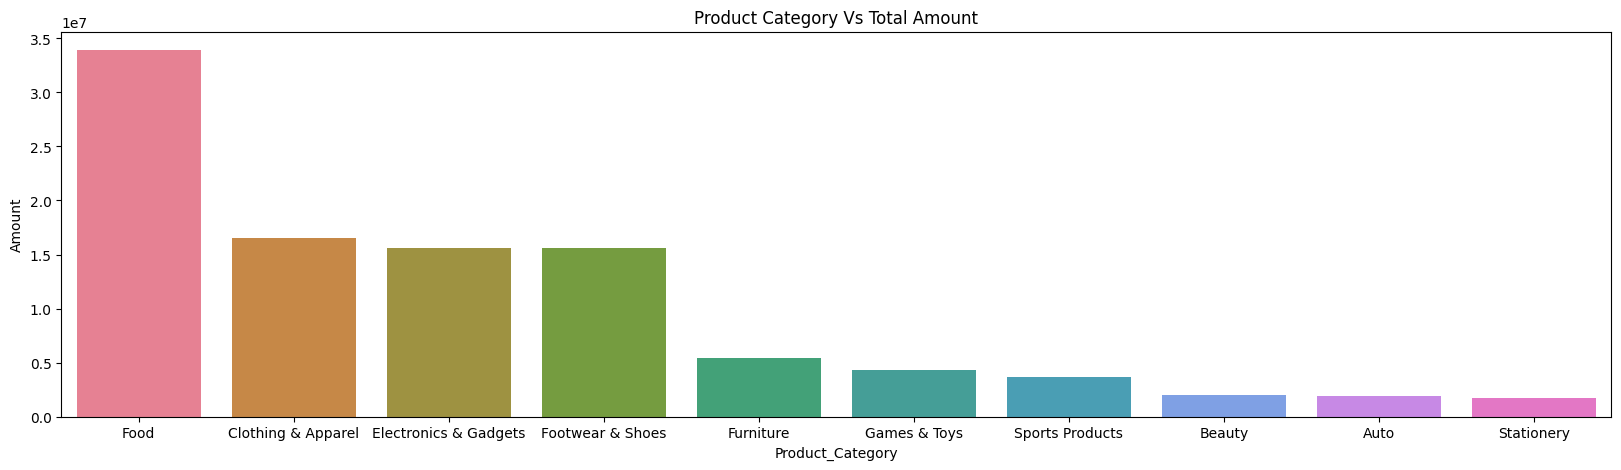

In [75]:
k=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.title('Product Category Vs Total Amount')
sns.barplot(data=k, x='Product_Category', y='Amount', palette='husl')

*From the above graph we can see that most of the sold products are from Food, Clothing, and Electronics Category*

***Product Id***

C:\Users\navin\AppData\Local\Temp\ipykernel_2076\2809349863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=l, x='Product_ID', y='Orders', palette='husl')


<Axes: title={'center': 'Orders Vs Product_ID'}, xlabel='Product_ID', ylabel='Orders'>

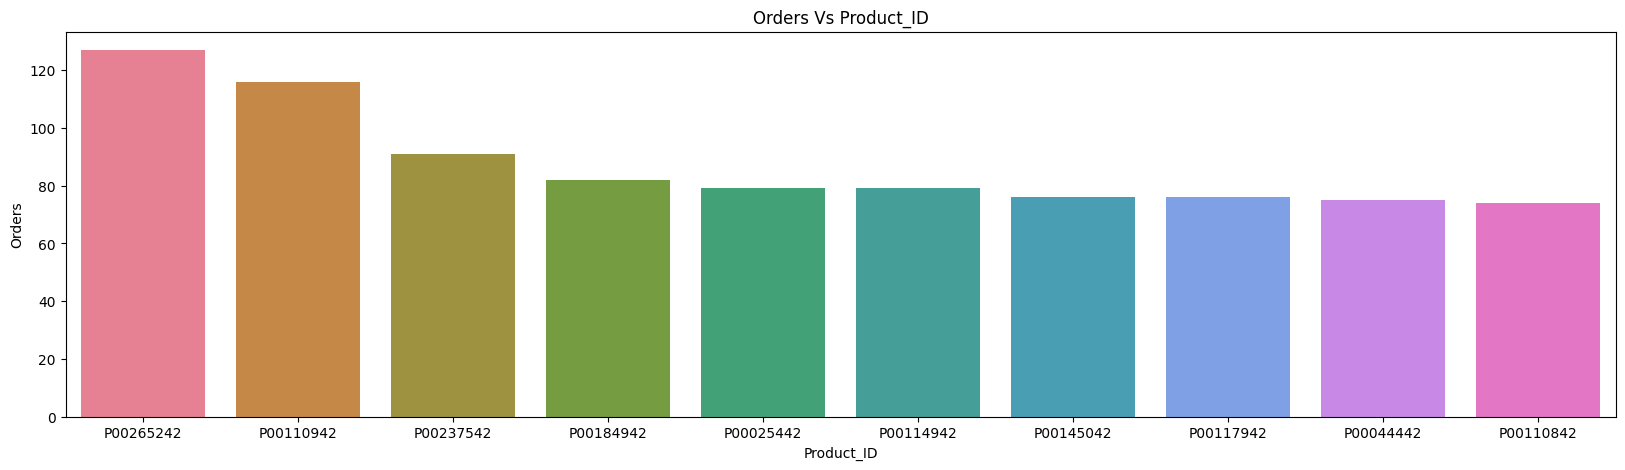

In [76]:
l=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.title('Orders Vs Product_ID')
sns.barplot(data=l, x='Product_ID', y='Orders', palette='husl')

<Axes: xlabel='Product_ID'>

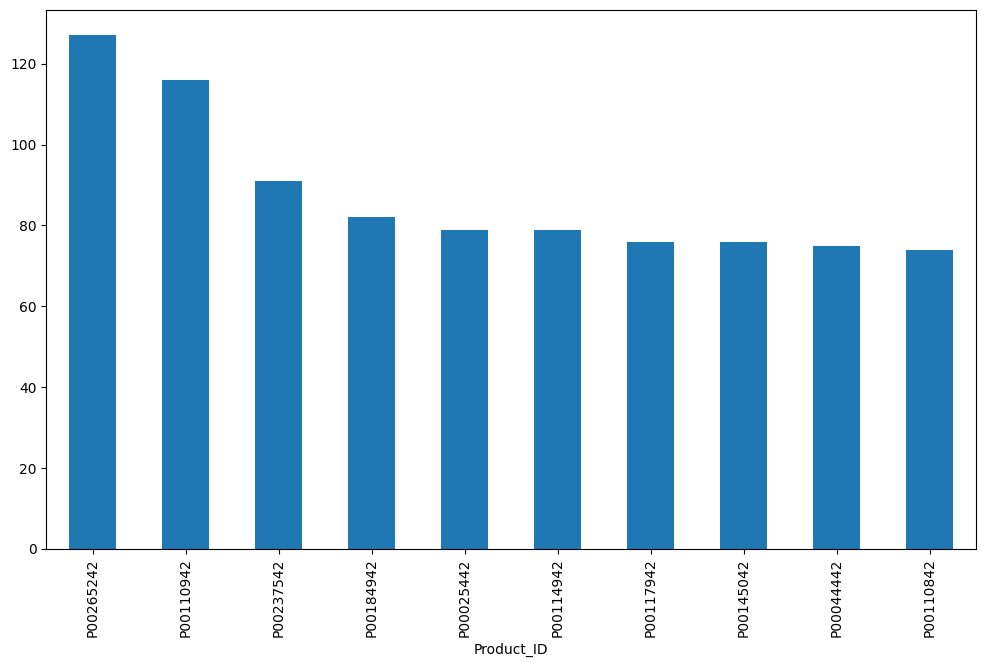

In [79]:
#Top 10 Most Sold Products (same as above)
plt.figure(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

***Conclusion***

*Married Women age group 26-35 years from UttarPradesh, Maharastra, Karnataka and Delhi in IT sector, Healthcare, Aviation and banking are most likely to buy products from Food, Clothing, Electronics and Footwear Category*